## Written by Nadia Bolstein and Cesare Spinoso

# Data preprocessing: more art than science?

## Contents of this notebook:
<ol>
<li>Load and examine your data</li>
<li>Merging two dataframes</li>
<li>Removing features that you do not need</li>
<li>Making your data machine-readable</li>
<li>Handling not available (NA) and inf data</li>
<li>Data visualization</li>
<li>2D image visualization</li>
</ol>

# Setup
Fetch the dataset that you'll be working with throughout this assignment.


In [2]:
!git clone https://github.com/NadiaBlostein/Open-Access-HCP-Data.git

Cloning into 'Open-Access-HCP-Data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 1), reused 21 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), 3.35 MiB | 9.00 MiB/s, done.


Examine your directory structure with the `ls` command. To invoke this command from a jupyter notebook in Google Colab, the `ls` command should be preceded with `!`. 

In [3]:
!ls

Open-Access-HCP-Data  sample_data


Change the working directory of the notebook to within the folder `McMedHacks2022_Prep_Week_3_Assignment`. The `cd` command should be preceded with `%`.


In [4]:
%cd Open-Access-HCP-Data
!ls

/content/Open-Access-HCP-Data
HCP_2D_slices_MRI_data	HCP_csv_data  README.md


In this assignment, we will be working with data from the Human Connectome Project (HCP). You can read more about the data [here](https://github.com/NadiaBlostein/McMedHacks2022_Prep_Week_3_Assignment#readme). Specifically, you will preprocess `.csv` (in the `HCP_csv_data` folder) and `.png` files (in the `HCP_2D_slices_MRI_data` folder).

In [5]:
!ls HCP_2D_slices_MRI_data

HCP_102109_T1w_acpc_dc_restore_brain_t1_axial.png
HCP_102109_T1w_acpc_dc_restore_brain_t1_coronal.png
HCP_102109_T1w_acpc_dc_restore_brain_t1_sagittal.png
HCP_210112_T1w_acpc_dc_restore_brain_t1_axial.png
HCP_210112_T1w_acpc_dc_restore_brain_t1_coronal.png
HCP_210112_T1w_acpc_dc_restore_brain_t1_sagittal.png
HCP_552241_T1w_acpc_dc_restore_brain_t1_axial.png
HCP_552241_T1w_acpc_dc_restore_brain_t1_coronal.png
HCP_552241_T1w_acpc_dc_restore_brain_t1_sagittal.png
HCP_615441_T1w_acpc_dc_restore_brain_t1_axial.png
HCP_615441_T1w_acpc_dc_restore_brain_t1_coronal.png
HCP_615441_T1w_acpc_dc_restore_brain_t1_sagittal.png
HCP_995174_T1w_acpc_dc_restore_brain_t1_axial.png
HCP_995174_T1w_acpc_dc_restore_brain_t1_coronal.png
HCP_995174_T1w_acpc_dc_restore_brain_t1_sagittal.png


In [6]:
!ls HCP_csv_data 

HCP_volumes.csv  unrestricted_HCP_behavioral.csv


# 1. Load and examine your data

### Preliminary examination of your data

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("HCP_csv_data/unrestricted_HCP_behavioral.csv")

**Question 1:** How many subjects (rows) and features (columns) do you have?

In [8]:
##TODO - complete
response11 = df.shape[0] #TODO
response12 = df.shape[1] #TODO
print(f"Num subjects: {response11}")
print(f"Num features: {response12}")

Num subjects: 1206
Num features: 499


Feel free to examine your data frame in the empty code cell below. Examples of valuable commands for a preliminary look at one's data frame: `df.info()`, `df.describe()`, `df.columns()`, `df.head()`, `df.tail`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Columns: 499 entries, Subject to Mars_Final
dtypes: float64(410), int64(25), object(64)
memory usage: 4.6+ MB


In [10]:
df.describe()

,Subject,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,PSQI_Comp4,PSQI_Comp5,PSQI_Comp6,PSQI_Comp7,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1196.000000,1204.000000,1204.000000,1201.000000,1205.000000,1200.000000,1200.000000,1198.000000,1195.000000,1195.000000
mean,374551.585406,28.985904,4.854892,0.903814,0.981758,0.575456,0.466003,1.105307,0.235489,0.587065,...,4.404682,110.421321,97.727500,1.449625,45.847718,95.166983,93.998533,1.845467,0.581590,1.822251
std,272686.898230,1.048516,2.802134,0.631696,0.828736,0.817157,0.807694,0.510167,0.671359,0.637916,...,1.513823,9.107963,11.273251,1.783069,7.679288,14.583412,14.837851,0.541393,0.973172,0.542893
min,100004.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.400000,82.740000,59.860000,0.000000,38.600000,56.350000,59.500000,1.560000,0.000000,1.080000
25%,154254.250000,28.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.600000,101.120000,87.110000,0.000000,38.600000,84.070000,83.220000,1.800000,0.000000,1.760000
50%,212166.500000,29.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.400000,108.790000,98.040000,1.000000,45.900000,95.360000,94.970000,1.800000,0.000000,1.800000
75%,586310.500000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,5.200000,122.250000,110.450000,2.000000,52.200000,105.570000,102.920000,1.880000,1.000000,1.840000
max,996782.000000,30.000000,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,14.000000,122.250000,111.410000,10.000000,75.300000,134.650000,131.380000,15.000000,17.000000,15.000000


In [11]:
df.head()

,Subject,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,PSQI_Comp4,PSQI_Comp5,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,M,22-25,29,8,1,2,2,1,1,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,M,26-30,30,6,1,1,1,1,1,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,F,26-30,29,4,1,0,1,0,2,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,M,31-35,30,4,1,1,0,0,1,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,M,26-30,30,4,1,1,0,0,1,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


Next, we will select the `Gender` column to count how many instances we have of each value.

In [12]:
#TODO - complete
response13 = df['Gender'].tolist() #TODO
response14 = df['Gender'].value_counts() #TODO
print(f"unique values of column: {response13}") # prints list of unique values in a feature / column
print(f"\nvalue counts of column:\n{response14}") # counts how many times each unique value in a feature / column occurs

unique values of column: ['M', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F',

**Question 2:** Is there another way to count how many males and females are in this dataset? 

In [13]:
#@title
response21 = len(df[df['Gender'] == 'F']) #TODO
response22 = len(df[df['Gender'] == 'M']) #TODO
print(f"Number females: {response21}")
print(f"Number males: {response22}")

Number females: 656
Number males: 550


**Question 3:** Display only the rows associated with female subjects.

In [14]:
#@title
#TODO
df[df['Gender'] == "F"]

,Subject,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,PSQI_Comp4,PSQI_Comp5,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
2,100307,F,26-30,29,4,1,0,1,0,2,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
5,101006,F,31-35,28,2,1,1,0,0,0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
7,101208,F,31-35,30,6,1,2,0,0,2,...,4.4,101.12,87.11,1.0,50.1,105.57,102.32,1.92,0.0,1.92
10,101612,F,26-30,28,4,1,1,0,0,1,...,4.4,122.25,111.41,2.0,48.7,97.26,96.41,1.84,0.0,1.84
11,101915,F,31-35,29,6,1,1,1,1,1,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,984472,F,26-30,30,5,1,1,1,0,1,...,2.8,122.25,110.45,0.0,38.6,108.73,108.00,1.76,0.0,1.76
1196,987983,F,26-30,30,3,1,1,0,0,1,...,5.2,108.79,97.19,5.0,56.4,88.02,87.70,1.88,0.0,1.88
1200,992673,F,31-35,30,0,0,0,0,0,0,...,3.6,122.25,111.41,1.0,38.6,101.63,99.26,1.80,0.0,1.80
1202,993675,F,26-30,30,4,1,1,1,0,1,...,0.4,122.25,110.45,0.0,38.6,84.07,84.25,1.80,1.0,1.76


### A side note on documentation
Woah! So many columns and abbreviations! What do they all mean? Make sure you know where your [dataset's documentation](https://wiki.humanconnectome.org/display/PublicData/HCP-YA+Data+Dictionary-+Updated+for+the+1200+Subject+Release#HCPYADataDictionaryUpdatedforthe1200SubjectRelease-Instrument:Demographics) is.

Unfortunately, thorough documentation is not always available. Some data types are also very field-specific and require the help of experts, which is part of what makes machine learning so wonderfully interdisciplinary.

Let's take a look at what features we have here:

In [15]:
print(df.columns)

Index(['Subject', 'Gender', 'Age', 'MMSE_Score', 'PSQI_Score', 'PSQI_Comp1',
       'PSQI_Comp2', 'PSQI_Comp3', 'PSQI_Comp4', 'PSQI_Comp5',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=499)


**Question 4:** The script above is not printing ALL of the columns... How do we fix that to be able to see all the features in the dataset?

In [16]:
#@title
count = 0
for col in df.columns:
  print(col) #TO COMPLETE
  count += 1

# Print the total number of features
print()
print(f"There are {count} features in the data") 


Subject
Gender
Age
MMSE_Score
PSQI_Score
PSQI_Comp1
PSQI_Comp2
PSQI_Comp3
PSQI_Comp4
PSQI_Comp5
PSQI_Comp6
PSQI_Comp7
PSQI_BedTime
PSQI_Min2Asleep
PSQI_GetUpTime
PSQI_AmtSleep
PSQI_Latency30Min
PSQI_WakeUp
PSQI_Bathroom
PSQI_Breathe
PSQI_Snore
PSQI_TooCold
PSQI_TooHot
PSQI_BadDream
PSQI_Pain
PSQI_Other
PSQI_Quality
PSQI_SleepMeds
PSQI_DayStayAwake
PSQI_DayEnthusiasm
PSQI_BedPtnrRmate
PicSeq_Unadj
PicSeq_AgeAdj
CardSort_Unadj
CardSort_AgeAdj
Flanker_Unadj
Flanker_AgeAdj
PMAT24_A_CR
PMAT24_A_SI
PMAT24_A_RTCR
ReadEng_Unadj
ReadEng_AgeAdj
PicVocab_Unadj
PicVocab_AgeAdj
ProcSpeed_Unadj
ProcSpeed_AgeAdj
DDisc_SV_1mo_200
DDisc_SV_6mo_200
DDisc_SV_1yr_200
DDisc_SV_3yr_200
DDisc_SV_5yr_200
DDisc_SV_10yr_200
DDisc_SV_1mo_40K
DDisc_SV_6mo_40K
DDisc_SV_1yr_40K
DDisc_SV_3yr_40K
DDisc_SV_5yr_40K
DDisc_SV_10yr_40K
DDisc_AUC_200
DDisc_AUC_200.1
DDisc_AUC_40K
VSPLOT_TC
VSPLOT_CRTE
VSPLOT_OFF
SCPT_TP
SCPT_TN
SCPT_FP
SCPT_FN
SCPT_TPRT
SCPT_SEN
SCPT_SPEC
SCPT_LRNR
IWRD_TOT
IWRD_RTC
ListSort_Unadj
ListSort

### Selecting the features you want to work with:
As you saw above, this dataframe has 499 features. Often, you will only want to work with a subset of the features of a dataframe, so you will have to create a new dataframe with this subset.

In [17]:
basics = ['Subject','Gender','Age','PSQI_BedTime']
df[basics]

,Subject,Gender,Age,PSQI_BedTime
0,100004,M,22-25,9:00:00
1,100206,M,26-30,22:30:00
2,100307,F,26-30,22:00:00
3,100408,M,31-35,22:00:00
4,100610,M,26-30,21:30:00
...,...,...,...,...
1201,992774,M,31-35,22:00:00
1202,993675,F,26-30,22:00:00
1203,994273,M,26-30,2:00:00
1204,995174,M,22-25,23:00:00


Let's also add all of some cognitive variables to the mix! Specifically, we'll select the measures related to fluid intelligence (they start with `PMAT` for Penn Matrix Test) and impulsivity (they start with `DDisc` for Delay Discounting)

In [18]:
cognition = ['Subject','Gender','Age','PSQI_BedTime']
for col in df.columns:
    if (col.find("PMAT")!=-1 or col.find("DDisc")!=-1):
        cognition.append(col)
print(f"List of variables we will be looking at: {cognition}") # PS: f-strings will be very useful for you in your Python journey!

List of variables we will be looking at: ['Subject', 'Gender', 'Age', 'PSQI_BedTime', 'PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR', 'DDisc_SV_1mo_200', 'DDisc_SV_6mo_200', 'DDisc_SV_1yr_200', 'DDisc_SV_3yr_200', 'DDisc_SV_5yr_200', 'DDisc_SV_10yr_200', 'DDisc_SV_1mo_40K', 'DDisc_SV_6mo_40K', 'DDisc_SV_1yr_40K', 'DDisc_SV_3yr_40K', 'DDisc_SV_5yr_40K', 'DDisc_SV_10yr_40K', 'DDisc_AUC_200', 'DDisc_AUC_200.1', 'DDisc_AUC_40K']


**Question 5:** Now that we made a list of all of the features we want to examine, select this subset of our data and make it a separate dataframe called `df_cognition`.

In [19]:
#@title
df_cognition = df[cognition] #TODO

In [20]:
df_cognition.shape

(1206, 22)

# 2. Merging two dataframes

For our dataset of 1206 subjects, we have information about their gender, age range and a variety of cognitive measures. It would be interesting to integrate some other data as well. You have been provided with a separate file that contains brain structure volume data obtained from the neuroimaging data of these same subjects (note that not all subjects in the HCP have neuroimaging data) (see [README](https://github.com/NadiaBlostein/McMedHacks2022_Prep_Week_3_Assignment#readme) to learn more about how volumes were obtained).

In [21]:
df_volumes = pd.read_csv("HCP_csv_data/HCP_volumes.csv")

**Question 6:** How many subjects and features does `df_volumes` have?

In [22]:
#@title
response61 = df_volumes.shape[0] #TODO
response62 = df_volumes.shape[1] #TODO
print(f"Num subjects: {response61}")
print(f"Num features: {response62}")

Num subjects: 1086
Num features: 14


In [23]:
df_volumes.head(5)

,Subject,TBV,Gp_Left,Gp_Right,Str_Left,Str_Right,Thal_Left,Thal_Right,str_left_SA,str_right_SA,thal_left_SA,thal_right_SA,gp_left_SA,gp_right_SA
0,100206,1694580,1746.90,1597.69,11848.20,12030.00,7827.26,7750.77,15156.32547,16506.40087,7902.211643,8394.220729,3603.322526,3751.440646
1,100307,1319380,1489.99,1291.05,9470.57,9749.09,5743.19,5773.38,12555.09774,13845.51983,6368.274739,6969.617635,3149.392096,3156.322277
2,100408,1563630,1617.93,1531.84,10274.90,10693.40,6865.83,6842.16,14165.48884,15590.63180,7235.193241,7763.609633,3476.901847,3725.802635
3,100610,1585390,1841.22,1639.88,12464.30,12575.80,7452.36,7598.48,15493.70123,16940.05756,7594.851693,8316.436428,3862.828117,3893.266274
4,101006,1261040,1679.33,1571.28,9774.47,9967.58,5856.38,5877.30,13309.15216,14458.50988,6514.710165,7003.367310,3586.431707,3773.869259


In [24]:
df_volumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject        1086 non-null   int64  
 1   TBV            1086 non-null   int64  
 2   Gp_Left        1086 non-null   float64
 3   Gp_Right       1086 non-null   float64
 4   Str_Left       1086 non-null   float64
 5   Str_Right      1086 non-null   float64
 6   Thal_Left      1086 non-null   float64
 7   Thal_Right     1086 non-null   float64
 8   str_left_SA    1086 non-null   float64
 9   str_right_SA   1086 non-null   float64
 10  thal_left_SA   1086 non-null   float64
 11  thal_right_SA  1086 non-null   float64
 12  gp_left_SA     1086 non-null   float64
 13  gp_right_SA    1086 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 118.9 KB


**Question 7:** Print the mean and standard deviation of total brain volume (TBV) of this sample. Note that the unit is in mm3.

In [36]:
#@title
response71 = df_volumes['TBV'].mean() #TODO
response72 = df_volumes['TBV'].std() #TODO
print(f"Mean TBV: {response71}")
print(f"TBV standard deviation: {response72}")

Mean TBV: 1406181.3996316758
TBV standard deviation: 151214.50029241372


**Question 8:** List all the subjects whose TBV is above average.

In [39]:
#@title
#TODO
df_volumes[df_volumes['TBV'] > response71]

,Subject,TBV,Gp_Left,Gp_Right,Str_Left,Str_Right,Thal_Left,Thal_Right,str_left_SA,str_right_SA,thal_left_SA,thal_right_SA,gp_left_SA,gp_right_SA
0,100206,1694580,1746.90,1597.69,11848.20,12030.00,7827.26,7750.77,15156.32547,16506.40087,7902.211643,8394.220729,3603.322526,3751.440646
2,100408,1563630,1617.93,1531.84,10274.90,10693.40,6865.83,6842.16,14165.48884,15590.63180,7235.193241,7763.609633,3476.901847,3725.802635
3,100610,1585390,1841.22,1639.88,12464.30,12575.80,7452.36,7598.48,15493.70123,16940.05756,7594.851693,8316.436428,3862.828117,3893.266274
6,101309,1426200,1690.65,1507.14,10144.90,10251.60,6266.95,6182.92,13848.22982,15324.77410,6798.623361,7329.928997,3582.231784,3677.827998
7,101410,1588370,1440.26,1328.78,9376.25,9713.07,6865.83,6683.70,13217.76480,14592.03987,7153.875176,7624.042048,3143.810997,3339.830347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,987074,1451930,1541.44,1384.69,10053.70,10266.00,6290.62,6012.10,13970.55221,14972.19121,7221.456229,7054.193554,3353.157608,3502.805296
1079,991267,1802370,1804.52,1681.04,12363.10,12466.30,7433.50,7367.64,15554.95026,16965.02114,7649.207918,8214.273885,3620.911699,3828.376050
1083,994273,1487180,1646.74,1501.31,11164.60,11670.90,6711.82,6886.75,14637.99165,16242.63411,7100.454111,7637.944904,3441.358390,3549.415428
1084,995174,1517230,1678.30,1594.26,11154.40,11338.60,6766.36,6734.46,14516.88893,15906.36860,7263.501869,7809.016115,3535.013585,3761.052946


Ok! Let's merge our dataframes. One problem is that our behavioral data has 1206 subjects and our volume data has 1086 subjects. 

**Question 9:** Create a new dataframe called `df_final` where we only keep the subjects for which we have all of our features.

In [33]:
#@title
#TODO
df_final = df_volumes.merge(df_cognition, on = 'Subject', how = 'inner')

df_final.head()

,Subject,TBV,Gp_Left,Gp_Right,Str_Left,Str_Right,Thal_Left,Thal_Right,str_left_SA,str_right_SA,...,DDisc_SV_10yr_200,DDisc_SV_1mo_40K,DDisc_SV_6mo_40K,DDisc_SV_1yr_40K,DDisc_SV_3yr_40K,DDisc_SV_5yr_40K,DDisc_SV_10yr_40K,DDisc_AUC_200,DDisc_AUC_200.1,DDisc_AUC_40K
0,100206,1694580,1746.90,1597.69,11848.20,12030.00,7827.26,7750.77,15156.32547,16506.40087,...,9.38,30625.0,625.0,625.0,3125.0,625.0,625.0,0.097072,0.097072,0.050000
1,100307,1319380,1489.99,1291.05,9470.57,9749.09,5743.19,5773.38,12555.09774,13845.51983,...,9.38,19375.0,29375.0,24375.0,9375.0,9375.0,9375.0,0.162176,0.162176,0.311459
2,100408,1563630,1617.93,1531.84,10274.90,10693.40,6865.83,6842.16,14165.48884,15590.63180,...,9.38,39375.0,29375.0,24375.0,19375.0,18125.0,4375.0,0.203061,0.203061,0.421354
3,100610,1585390,1841.22,1639.88,12464.30,12575.80,7452.36,7598.48,15493.70123,16940.05756,...,146.88,39375.0,39375.0,39375.0,39375.0,36875.0,24375.0,0.801629,0.801629,0.868750
4,101006,1261040,1679.33,1571.28,9774.47,9967.58,5856.38,5877.30,13309.15216,14458.50988,...,40.63,39375.0,36875.0,34375.0,34375.0,29375.0,28125.0,0.283791,0.283791,0.783073


In [34]:
print(df_final.shape)

(1086, 35)


Mission accomplished! We have 1086 and 35 features (22 features + 12 features - `Subject` features which is shared by both dfs).

# 3. Removing features that you do not need

**Question 10:** Find and remove any duplicate columns.

In [ ]:
#@title
cols_to_drop=[]
for i in range(df_final.shape[1]):
    for j in range(i+1,df_final.shape[1]):
        col1=df_final.columns[i]
        col2=df_final.columns[j]
        if #TODO
df_final.drop(cols_to_drop, inplace=True, axis=1)

In [ ]:
print(df_final.shape) 

# 4. Making your data machine-readable

To be machine-readable, your variables need to be numerical. Want to check?

In [35]:
df_final.dtypes

Subject                int64
TBV                    int64
Gp_Left              float64
Gp_Right             float64
Str_Left             float64
Str_Right            float64
Thal_Left            float64
Thal_Right           float64
str_left_SA          float64
str_right_SA         float64
thal_left_SA         float64
thal_right_SA        float64
gp_left_SA           float64
gp_right_SA          float64
Gender                object
Age                   object
PSQI_BedTime          object
PMAT24_A_CR          float64
PMAT24_A_SI          float64
PMAT24_A_RTCR        float64
DDisc_SV_1mo_200     float64
DDisc_SV_6mo_200     float64
DDisc_SV_1yr_200     float64
DDisc_SV_3yr_200     float64
DDisc_SV_5yr_200     float64
DDisc_SV_10yr_200    float64
DDisc_SV_1mo_40K     float64
DDisc_SV_6mo_40K     float64
DDisc_SV_1yr_40K     float64
DDisc_SV_3yr_40K     float64
DDisc_SV_5yr_40K     float64
DDisc_SV_10yr_40K    float64
DDisc_AUC_200        float64
DDisc_AUC_200.1      float64
DDisc_AUC_40K 

We have 3 columns that are non-numerical: `Gender`,`Age`,`PSQI_BedTime`. Let's figure out how to handle them, one at a time.

### One-hot encoding or binarizing your data
First, we know that the `Gender` column is categorical and has two unique values: `M` or `F`. 

**Question 11:** Replace all of your `M` values with 1 and `F` values with 2.

In [37]:
#@title
df_final['Gender'] = df_final['Gender'].replace('M', 1) #TODO
df_final['Gender'] = df_final['Gender'].replace('F', 2) #TODO

In [38]:
df_final['Gender'].head(10)

0    1
1    2
2    1
3    1
4    2
5    1
6    1
7    1
8    2
9    1
Name: Gender, dtype: int64

**Quick note on one-hot encoding:** Suppose that you actually had more than 2 numerical values for this feature (e.g. `M`,`F`,`other`). If you just convert categorical variables to numerical values (ex: `M`=1,`F`=2,`other`=3), you give a "distance" to the relationship between variables. For instance, since 1 is closer to 2 than to 3, you are telling your machine that `M` is "closer" to `F` (`distance = 2 - 1 = 1`) than to `other` (`distance = 3 - 1 = 2`). One-hot encoding is a way to make sure the categories remain independant and we strongly suggest that you read more about it: "[A representation of categorical variables as binary vectors](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)"

### Parsing strings in your data

#### Handling the `Age` feature

Remember that our `Age` feature is also non-numerical!

In [39]:
df_final['Age'].value_counts()

26-30    476
31-35    371
22-25    226
36+       13
Name: Age, dtype: int64

For the sake of this exercise, let's replace 36+ with a range of 36-40.

In [40]:
df_final['Age'] = df_final['Age'].replace("36+",'36-40')
df_final['Age'].value_counts()

26-30    476
31-35    371
22-25    226
36-40     13
Name: Age, dtype: int64

Our age range values are organized very clearly: `minimum age–maximum age`. These age range strings can therefore be split around the `-` such that you create two new columns: one for `minimum age` and one for `maximum age`.

In [41]:
fix_age = df_final['Age'].str.split('-', 1, expand=True)
fix_age.columns = ['min','max']
fix_age["min"] = fix_age['min'].astype(float)
fix_age["max"] = fix_age['max'].astype(float)
fix_age

<ipython-input-41-97219c9d5b09>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  fix_age = df_final['Age'].str.split('-', 1, expand=True)


,min,max
0,26.0,30.0
1,26.0,30.0
2,31.0,35.0
3,26.0,30.0
4,31.0,35.0
...,...,...
1081,31.0,35.0
1082,26.0,30.0
1083,26.0,30.0
1084,22.0,25.0


**Question 12:** Using the code in the cell above, replace the age range string for each subject with the mean of the subject's respective age range.

In [42]:
#@title
fix_age['mean'] = (fix_age['min'] + fix_age['max'])/2 #TODO
df_final['Age'] = fix_age['mean']

In [43]:
df_final.head(3)

,Subject,TBV,Gp_Left,Gp_Right,Str_Left,Str_Right,Thal_Left,Thal_Right,str_left_SA,str_right_SA,...,DDisc_SV_10yr_200,DDisc_SV_1mo_40K,DDisc_SV_6mo_40K,DDisc_SV_1yr_40K,DDisc_SV_3yr_40K,DDisc_SV_5yr_40K,DDisc_SV_10yr_40K,DDisc_AUC_200,DDisc_AUC_200.1,DDisc_AUC_40K
0,100206,1694580,1746.90,1597.69,11848.20,12030.00,7827.26,7750.77,15156.32547,16506.40087,...,9.38,30625.0,625.0,625.0,3125.0,625.0,625.0,0.097072,0.097072,0.050000
1,100307,1319380,1489.99,1291.05,9470.57,9749.09,5743.19,5773.38,12555.09774,13845.51983,...,9.38,19375.0,29375.0,24375.0,9375.0,9375.0,9375.0,0.162176,0.162176,0.311459
2,100408,1563630,1617.93,1531.84,10274.90,10693.40,6865.83,6842.16,14165.48884,15590.63180,...,9.38,39375.0,29375.0,24375.0,19375.0,18125.0,4375.0,0.203061,0.203061,0.421354


#### Handling the `PSQI_BedTime` feature

Convert your bed time variable from HH:MM:SS to seconds! You can walk through the code to figure out what each step does.
`

In [44]:
ftr = [3600,60,1]
for i in range(len(df_final['PSQI_BedTime'])):
    x = sum([a*b for a,b in zip(ftr, map(int,df_final['PSQI_BedTime'][i].split(':')))])
    df_final['PSQI_BedTime'][i] = x

<ipython-input-44-a73b152aec64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PSQI_BedTime'][i] = x


#### A note on other strings that often crop up in dataframes and need to be replaced with numbers!
`df_final = df_final.replace('FALSE',0)` \
`df_final = df_final.replace('TRUE',1)` \
`df_final = df_final.replace(False,0)` \
`df_final = df_final.replace(True,1)` \
`df_final = df_final.replace('0',0)` # example of random spaces \
`df_final = df_final.replace(' ',np.NaN)` # example of random spaces

**Question 13:** Write a code that makes sure that every column is of type float!

In [46]:
#@title
for col in df_final.columns:
    df_final[col] = df_final[col].astype(float) #TODO

# 5. Handling not available (NA) and inf data:

Sometimes, Python will convert some of your values to + or - infinity, which will result in downstream errors. Convert them to NA, and then handle them as NA values.

In [47]:
df_final = df_final.replace([np.inf, -np.inf], np.nan)

Next, you need to deal with your NA values. 

**Question 14:** How many nas do you have?

In [49]:
#@title
#TODO
df_final.isna().sum().sum()

147

In [55]:
df_final.columns
df_final['TBV'].median()

1393265.0

There is a variety of ways to handle NA data. The most simple approach is to replace NA data with the median (or mean) value of the feature of interest. There are [other](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) [more](https://arxiv.org/abs/1804.11087) sophisticated data imputation techniques out there, many of which actually leverage machine learning tools (so meta)!

**Question 15:** Replace the NA values of this dataframe with the feature-specific median (the median is more robust against outliers than the mean is).

In [56]:
#@title
for col in df_final.columns:
    df_final[col].fillna(df_final[col].median(), inplace = True)          #TODO)

In [57]:
df_final.isna().sum().sum()
# note the difference between df_final.isna().sum() and df_final.isna().sum().sum()

0

# 6. Data visualization

Data visualization is a wonderful way to get to know your data in order to plan a relevant analysis or find an appropriate machine learning application. [Matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are two canonical data visualization tools that you can use in Python.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Scatter plots

Text(0.5, 1.0, 'Total brain volume (TBV) as a function of bed time')

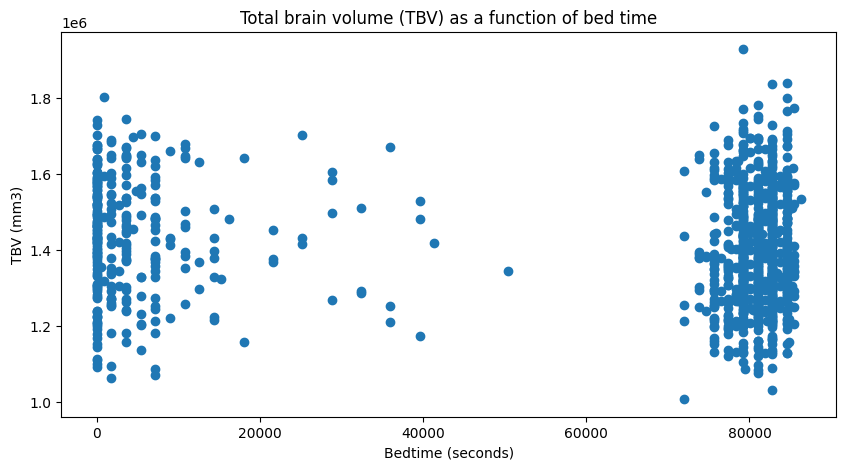

In [59]:
plt.rcParams["figure.figsize"] = (10,5) # adjust figure size
plt.scatter(df_final["PSQI_BedTime"],df_final["TBV"]) # plt.scatter(x, y)
plt.ylabel("TBV (mm3)") # name y-axis
plt.xlabel("Bedtime (seconds)") # name x-axis
plt.title("Total brain volume (TBV) as a function of bed time") # figure title

**Question 16:** Make a scatter plot of total brain volume (TBV) as a function of bed time, by gender.

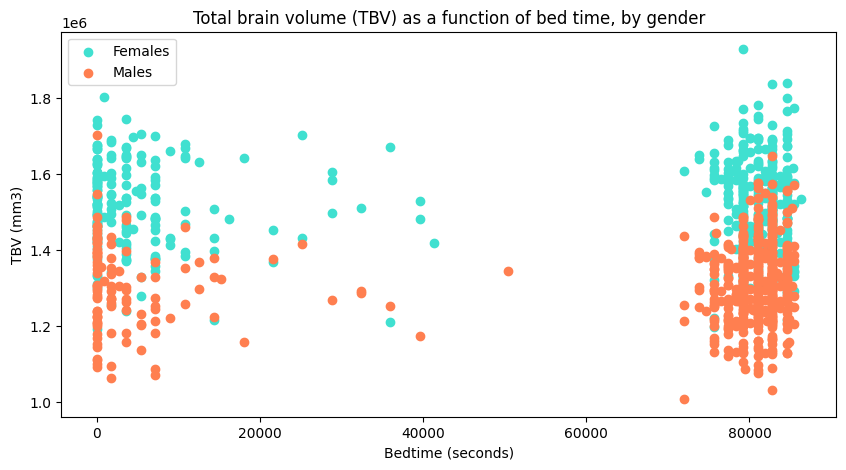

In [67]:
#@title
plt.rcParams["figure.figsize"] = (10,5) # adjust figure size
plt.scatter(df_final["PSQI_BedTime"], df_final['TBV'].where(df_final['Gender'] == 1), color='turquoise')
    # plot male datapoints first, in turquoise
plt.scatter(df_final["PSQI_BedTime"], df_final['TBV'].where(df_final['Gender'] == 2), color='coral')
    # plot female datapoints first, in coral
plt.ylabel("TBV (mm3)") # name y-axis
plt.xlabel("Bedtime (seconds)") # name x-axis
plt.title("Total brain volume (TBV) as a function of bed time, by gender") # figure title
plt.legend(['Females','Males']) # legend

#### Histogram plot

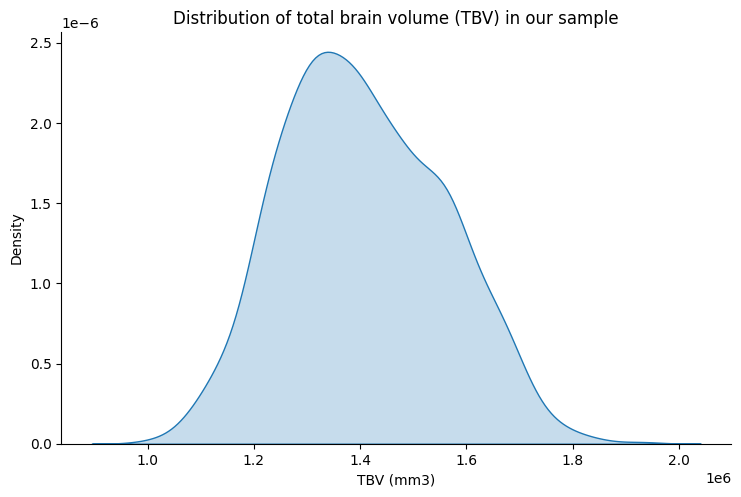

In [61]:
sns.displot(df_final,x='TBV',kind='kde',fill=True) # plot your histogram
plt.ylabel("Density") # name y-axis
plt.xlabel("TBV (mm3)") # name x-axis
plt.title("Distribution of total brain volume (TBV) in our sample") # figure title
plt.gcf().set_size_inches(8, 5) # another way to adjust figure size

In [62]:
df_final.columns

Index(['Subject', 'TBV', 'Gp_Left', 'Gp_Right', 'Str_Left', 'Str_Right',
       'Thal_Left', 'Thal_Right', 'str_left_SA', 'str_right_SA',
       'thal_left_SA', 'thal_right_SA', 'gp_left_SA', 'gp_right_SA', 'Gender',
       'Age', 'PSQI_BedTime', 'PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR',
       'DDisc_SV_1mo_200', 'DDisc_SV_6mo_200', 'DDisc_SV_1yr_200',
       'DDisc_SV_3yr_200', 'DDisc_SV_5yr_200', 'DDisc_SV_10yr_200',
       'DDisc_SV_1mo_40K', 'DDisc_SV_6mo_40K', 'DDisc_SV_1yr_40K',
       'DDisc_SV_3yr_40K', 'DDisc_SV_5yr_40K', 'DDisc_SV_10yr_40K',
       'DDisc_AUC_200', 'DDisc_AUC_200.1', 'DDisc_AUC_40K'],
      dtype='object')

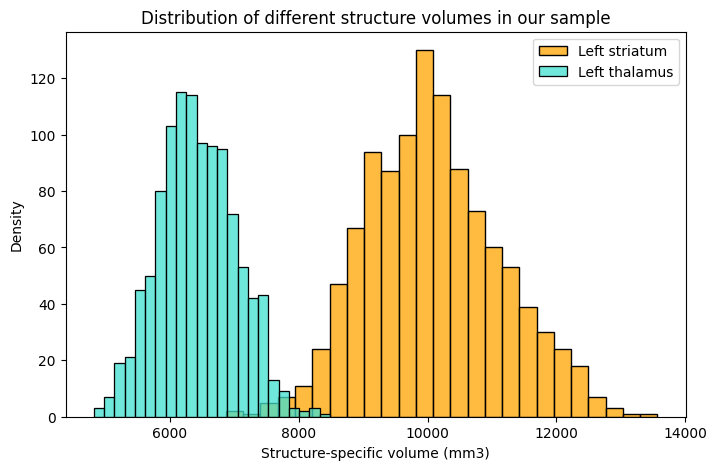

In [63]:
sns.histplot(df_final,x='Str_Left',fill=True,color='orange')
    # first, plot the distribution of the left striatum in orange
sns.histplot(df_final,x='Thal_Left',fill=True,color='turquoise')
    # second, plot the distribution of the left thalamus volume in turquoise
plt.legend(['Left striatum','Left thalamus'])
plt.ylabel("Density")
plt.xlabel("Structure-specific volume (mm3)")
plt.title("Distribution of different structure volumes in our sample")
plt.gcf().set_size_inches(8, 5) # adjust figure size
plt.show()

**Question 17:** Generate two smoothed and superimposed histograms of bed times in subjects that are above and below 30 years.

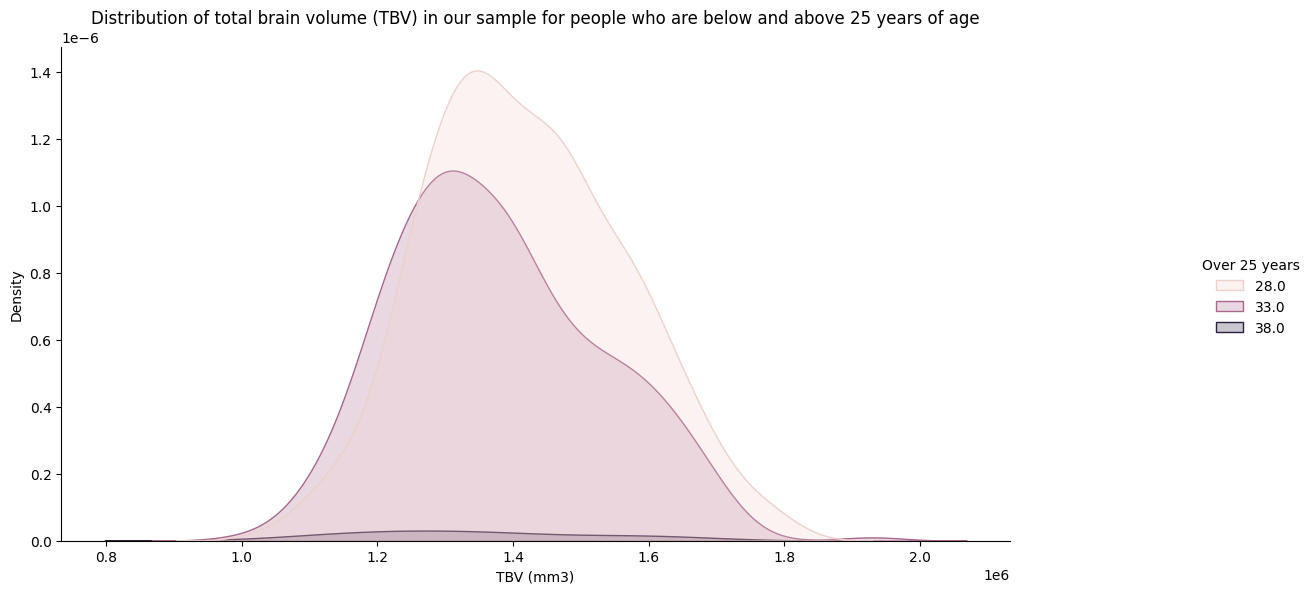

In [70]:
#@title
df_final["Over 25 years"]= df_final['Age'].where(df_final['Age'] > 25)   #TODO
sns.displot(df_final,x='TBV',hue='Over 25 years',kind='kde',fill=True)
plt.ylabel("Density")
plt.xlabel("TBV (mm3)")
plt.title("Distribution of total brain volume (TBV) in our sample for people who are below and above 25 years of age")
plt.gcf().set_size_inches(14, 6) 

Notice that brains seem to shrink with age in our dataset... Let's look at the numbers:

In [71]:
TBV_below_25=df_final['TBV'][df_final["Age"]<=25].mean()
TBV_above_25=df_final['TBV'][df_final["Age"]>25].mean()
print(f"Average TBV for people below or equal to 25 years of age: {round(TBV_below_25,0)} mm3") 
print(f"Average TBV for people above 25 years of age: {round(TBV_above_25,0)} mm3")

Average TBV for people below or equal to 25 years of age: 1431213.0 mm3
Average TBV for people above 25 years of age: 1399603.0 mm3


Interesting! However, does our sample actually have a similar amout of people who are below and above the age of 25? 

**Question 18:** Count how many people are <= 25 years, and how many people are > 25 yrs.

In [74]:
subj_above_25= len(df_final[df_final['Age'] <= 25 ]) #TODO
subj_below_25= len(df_final[df_final['Age'] > 25]) #TODO
print(f"We have {subj_below_25} subjects below or at 25 years of age and {subj_above_25} subjects above 25 years of age.")


We have 860 subjects below or at 25 years of age and 226 subjects above 25 years of age.


# 7. 2D image visualization
Let's visualize the `.png` files that come with this repository. We can do this by opening the image with the `PIL.Image` module seen in the previous lectures/assigments.

In [75]:
# Get the image as an array
from PIL import Image
import os

# Try changing the 
png_file_path = os.path.join("HCP_2D_slices_MRI_data", "HCP_102109_T1w_acpc_dc_restore_brain_t1_axial.png")
png_array = np.array(Image.open(png_file_path))

Let's inspect the `png_array` object. The `Image.open` method opens the `.png` as a numpy array, so we can use all the `numpy` array methods on it. 

**Qusetion 19:** Create a function `plot_png_array` which takes as parameters a list of `png_array`'s, a `title` and the figure size `figsize`. Hint: Look at the previous week's assignment and plots each element of the array as a grayscale.

In [76]:
# Function that plots a *list* of numpy arrays in grayscale
def plot_png_array(png_array_list, title, figsize=(10, 10)):
  for png_array in png_array_list:
    # Plot the image with imgshow
    fg, ax = plt.subplots(figsize=(10, 10))

    #TODO
    plt.imshow(png_array, cmap = 'gray')


    ax.set_title(title)

    plt.show()

Use the function you just created to plot the `png_array` assigned above.

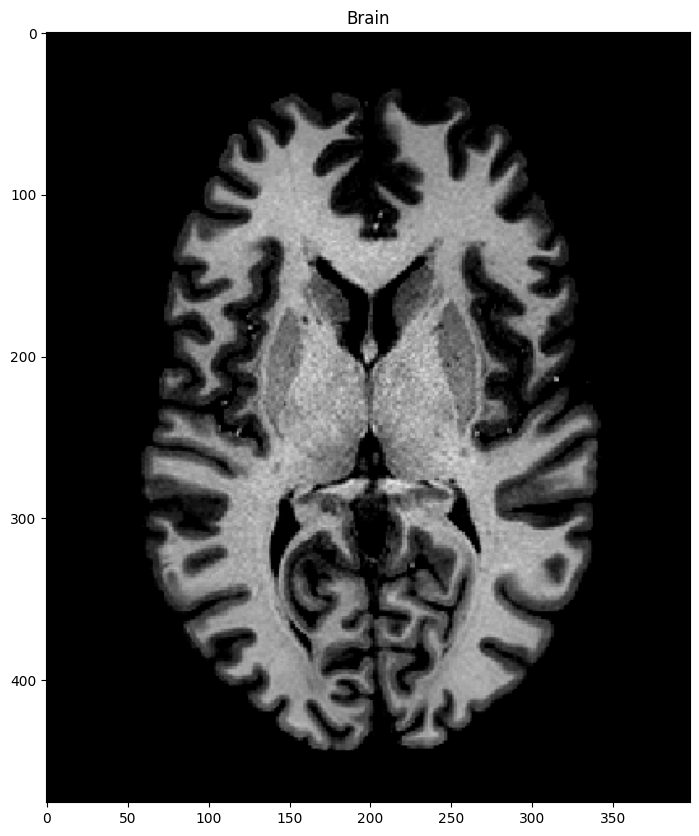

In [77]:
plot_png_array([png_array,], "Brain")

Inspect the following code. What do you think the `reduce_png_array_dim` does?

In [78]:
def reduce_png_array_dim(png_array, kernel_height=2, kernel_width=2):
  cropped_png_array = []
  for channel_idx in range(0, png_array.shape[-1]):
    cropped_channel_png_array = []
    for i in range(0, png_array.shape[0], kernel_height):
      cropped_array = []
      for j in range(0, png_array.shape[1], kernel_width):
        cropped_array.append(png_array[i:i+kernel_height, j:j+kernel_width, channel_idx].mean())
      cropped_channel_png_array.append(cropped_array)
    cropped_channel_png_array = np.array(cropped_channel_png_array)
    cropped_png_array.append(cropped_channel_png_array)
  cropped_png_array = np.array(cropped_png_array)
  # Numpy shape fix + convert to integer
  return np.moveaxis(cropped_png_array, 0, -1).astype(np.int32)

In [79]:
cropped_png_array = reduce_png_array_dim(png_array)

Hint: Look at the input before and after `reduce_png_array_dim`. What do you observe in terms of the 

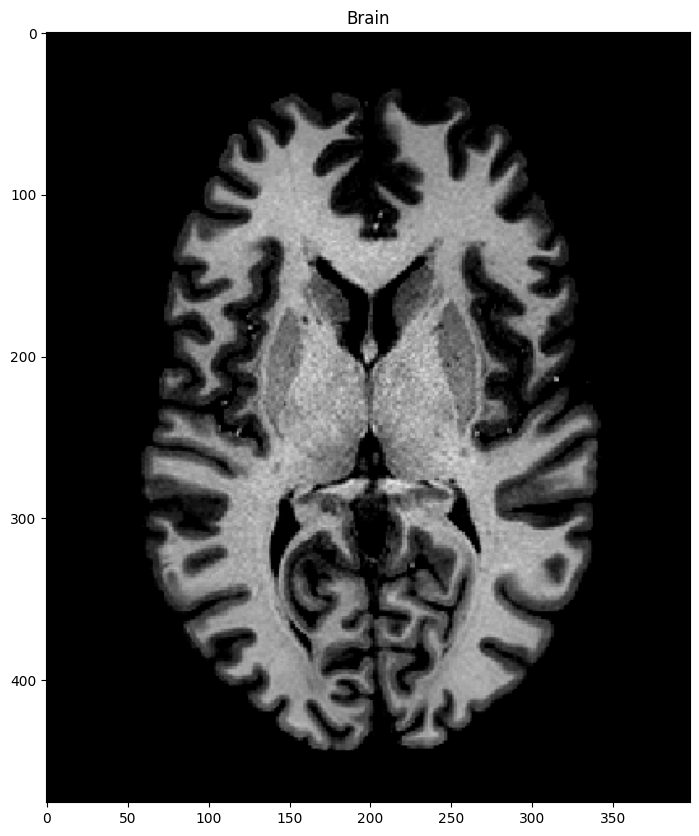

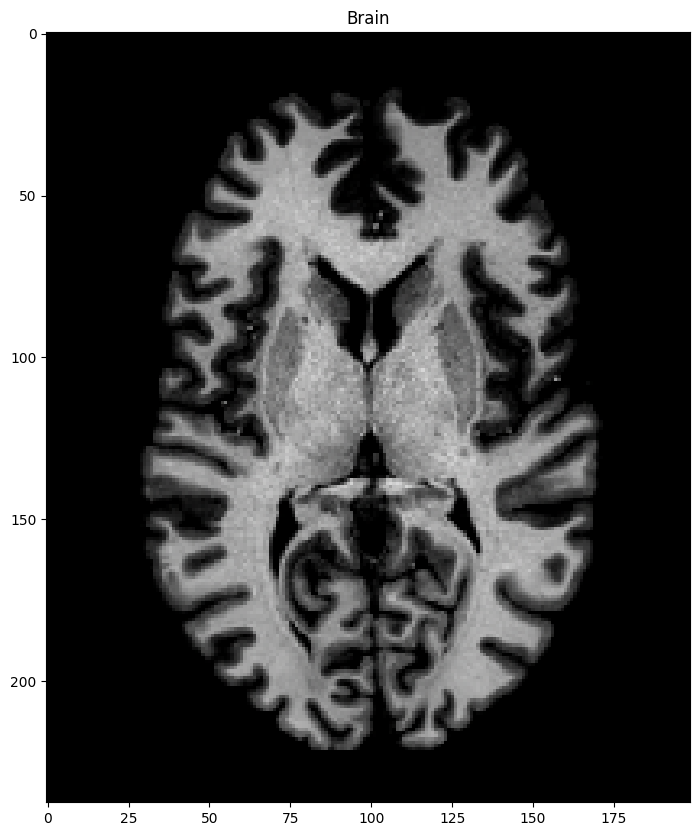

In [80]:
# Replot the original and cropped image
plot_png_array([png_array, cropped_png_array], "Brain")